We set up a $5\times 5$ matrix with prescribed eigenvalues, then apply the power iteration.

In [1]:
lambda = [1,-0.75,0.6,-0.4,0]

using LinearAlgebra
A = triu(ones(5,5),1) + diagm(0=>lambda)   # triangular matrix, eigs on diagonal

5×5 Array{Float64,2}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

We run the power iteration 60 times. The best estimate of the dominant eigenvalue is the last entry of `gamma`. 

In [2]:
include("../FNC.jl")
gamma,x = FNC.poweriter(A,60)
eigval = gamma[end]

1.0000000044191544

We check linear convergence using a log-linear plot of the error. We use our best estimate in order to compute the error at each step.

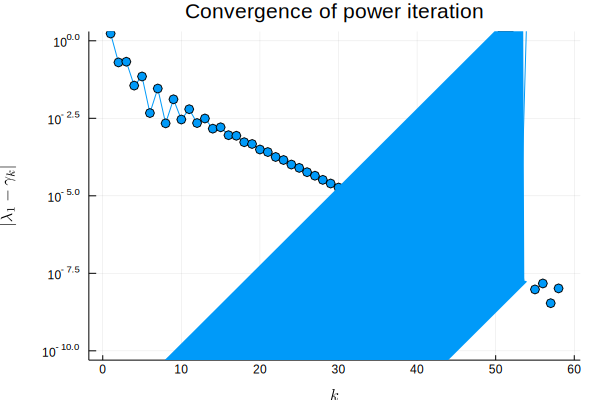

In [3]:
err = @. eigval - gamma

using Plots,LaTeXStrings
plot(0:59,abs.(err),m=:o,label="", 
    title="Convergence of power iteration",
    xlabel=L"k",yaxis=(L"|\lambda_1 - \gamma_k|",:log10,[1e-10,1]) )

The trend is clearly a straight line asymptotically. We can get a refined estimate of the error reduction in each step by using the exact eigenvalues.

In [4]:
@show theory = lambda[2]/lambda[1];
@show observed = err[40]/err[39];

theory = lambda[2] / lambda[1] = -0.75
observed = err[40] / err[39] = -0.7471702724365248


Note that the error is supposed to change sign on each iteration. An effect of these alternating signs is that estimates oscillate around the exact value.

In [5]:
gamma[36:40]

5-element Array{Float64,1}:
 1.0000044126461594
 0.9999967019463215
 1.0000024803982417
 0.9999981438158176
 1.0000013946066564